In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
adventureworks = pd.read_excel('/content/AdventureWorks_Database.xlsx')
budget = pd.read_excel('/content/Budget.xlsx', parse_dates=True, index_col=0)

# Print the column names of the adventureworks dataframe
print("AdventureWorks_Database.xlsx column names:")
print(adventureworks.columns)

# Print the column names of the budget dataframe
print("\nBudget.xlsx column names:")
print(budget.columns)

# Clean and preprocess the data
adventureworks = adventureworks.drop(['DateKey', 'Quarter', 'MonthNum', 'FiscalYear', 'FiscalQuarter',
                                      'FiscalMonthNum', 'FiscalMonth', 'MonthYear', 'MonthYearLong',
                                      'MonthYearNum', 'WeekdayNum', 'Weekday', 'WeekdayWeekend'], axis=1)
adventureworks['OrderDate'] = pd.to_datetime(adventureworks['Date'])
adventureworks['Year'] = adventureworks['OrderDate'].dt.year
adventureworks['Month'] = adventureworks['OrderDate'].dt.month
adventureworks['MonthName'] = adventureworks['OrderDate'].dt.month_name()
adventureworks = adventureworks.groupby(['Year', 'MonthName'])['SalesAmount'].sum().reset_index()
adventureworks['TotalSalesAmount'] = adventureworks['SalesAmount'].cumsum()

# Analyze the data
sales_by_month = adventureworks.groupby('MonthName')['SalesAmount'].sum().reset_index()
sales_variance = adventureworks[['MonthName', 'SalesAmount']].set_index('MonthName')
budget_monthly = budget.resample('M').sum().reset_index()
sales_vs_budget = pd.concat([sales_variance, budget_monthly], axis=1, sort=False)
sales_vs_budget = sales_vs_budget.dropna()
sales_vs_budget['Variance'] = sales_vs_budget['SalesAmount'] - sales_vs_budget['Budget']

# Visualize the data
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='MonthName', y='SalesAmount', data=sales_by_month, color='blue', alpha=0.7, ax=ax1)
ax1.set_ylabel('Sales Amount ($)', fontsize=12)
ax1.set_title('Sales by Month')
ax2 = ax1.twinx()
ax2.plot(sales_vs_budget.index, sales_vs_budget['Budget'], color='red', linestyle='--', label='Budget')
ax2.set_ylabel('Budget ($)', fontsize=12)
ax2.set_ylim(0, ax1.get_ylim()[1]*1.1)
plt.legend()
plt.show()

sns.heatmap(sales_vs_budget[['SalesAmount', 'Budget']], annot=True, cmap='YlGnBu')
plt.show()


AdventureWorks_Database.xlsx column names:
Index(['Date', 'DateKey', 'Year', 'Quarter', 'MonthNum', 'Month', 'FiscalYear',
       'FiscalQuarter', 'FiscalMonthNum', 'FiscalMonth', 'MonthYear',
       'MonthYearLong', 'MonthYearNum', 'WeekdayNum', 'Weekday',
       'WeekdayWeekend'],
      dtype='object')

Budget.xlsx column names:
Index(['Subcategory', 'ProductName', 'ProductKey', 'Jan, 2016', 'Feb, 2016',
       'Mar, 2016', 'Apr, 2016', 'May, 2016', 'Jun, 2016', 'Jul, 2016',
       'Aug, 2016', 'Sep, 2016', 'Oct, 2016', 'Nov, 2016', 'Dec, 2016',
       'Grand Total'],
      dtype='object')


KeyError: 'Column not found: SalesAmount'

<ipython-input-37-af486652edd2>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  budget_summary = budget_data.groupby('Subcategory').sum()


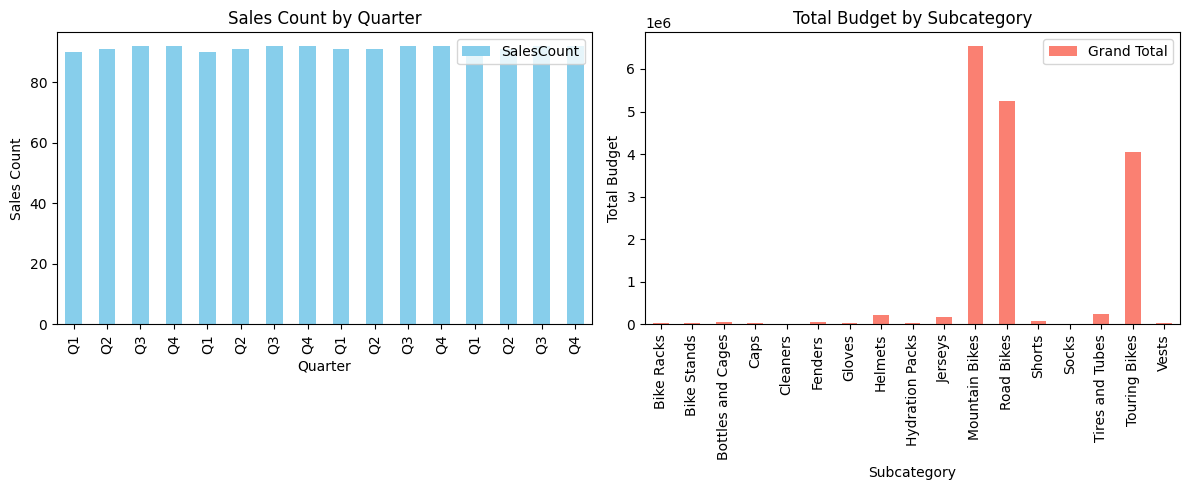

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
sales_data = pd.read_excel("/content/AdventureWorks_Database.xlsx")
budget_data = pd.read_excel("/content/Budget.xlsx")

# Extract necessary information about Sales
sales_summary = sales_data.groupby(['Year', 'Quarter']).size().reset_index(name='SalesCount')

# Extract necessary information about Budget
budget_summary = budget_data.groupby('Subcategory').sum()

# Visualize Sales and Budget
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Sales visualization
sales_summary.plot(kind='bar', x='Quarter', y='SalesCount', ax=axes[0], color='skyblue')
axes[0].set_title('Sales Count by Quarter')
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('Sales Count')

# Budget visualization
budget_summary.plot(kind='bar', y='Grand Total', ax=axes[1], color='salmon')
axes[1].set_title('Total Budget by Subcategory')
axes[1].set_xlabel('Subcategory')
axes[1].set_ylabel('Total Budget')

plt.tight_layout()
plt.show()
